# Machine Learning Project 

*Lavinia Benetollo 3265865, Natali Dzneladze ???, Giulia Marcantonio 3307112*

*May 16, 2025*

## 1. Exploration Data Analysis

Outline

Import libraries and load data 

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics        import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# to have a general overview of the dataset
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   15391 non-null  int64  
 1   id                           15391 non-null  int64  
 2   short_name                   15391 non-null  object 
 3   long_name                    15391 non-null  object 
 4   player_positions             15391 non-null  object 
 5   overall                      15391 non-null  int64  
 6   potential                    15391 non-null  int64  
 7   value_eur                    15333 non-null  float64
 8   wage_eur                     15342 non-null  float64
 9   age                          15391 non-null  int64  
 10  dob                          15391 non-null  object 
 11  height_cm                    15391 non-null  int64  
 12  weight_kg                    15391 non-null  int64  
 13  club_team_id    

In [202]:
# to generate summary statistics for the DataFrame
train.describe() 

,Unnamed: 0,id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,15391.000000,15391.000000,15391.000000,15391.000000,1.533300e+04,15342.000000,15391.000000,15391.000000,15391.000000,15342.000000,...,15391.000000,15391.000000,15391.000000,15391.000000,15391.000000,15391.000000,15391.000000,15391.000000,15391.000000,1729.000000
mean,7695.000000,231528.535573,65.769866,71.086219,2.851328e+06,8610.310402,25.210902,181.347671,75.016698,50564.380133,...,57.898967,46.477292,47.906309,45.766097,16.478851,16.268858,16.128452,16.320772,16.586447,36.426258
std,4443.143332,27015.569028,6.890025,6.112911,7.528281e+06,18559.644411,4.753887,6.850746,7.072550,54394.414397,...,12.206433,20.243681,21.296095,20.821395,17.662887,16.924093,16.633380,17.151288,17.975868,10.748515
min,0.000000,41.000000,47.000000,49.000000,9.000000e+03,456.558174,16.000000,155.000000,51.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,3847.500000,214610.500000,61.000000,67.000000,4.750000e+05,947.936111,21.000000,176.000000,70.000000,467.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,7695.000000,236573.000000,66.000000,71.000000,9.750000e+05,2841.616875,25.000000,181.000000,75.000000,1935.000000,...,59.000000,52.000000,55.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,11542.500000,253613.000000,70.000000,75.000000,2.000000e+06,7683.740466,29.000000,186.000000,80.000000,111138.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,15390.000000,264638.000000,92.000000,93.000000,1.375000e+08,331680.463188,54.000000,203.000000,110.000000,115820.000000,...,95.000000,92.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


### 1.1 Missing values

We want to investigate which features miss more values and need imputation/encoding hence we build a data frame with the 20 columns that have the highest fraction of missing values.

In [164]:
# calculate percentage of missing values for every column
missing_pct = (train.isnull().sum() / len(train) * 100)

# extract the 20 worst columns, turn into a DataFrame
top20_missing = (
    missing_pct
    .sort_values(ascending=False)   # sort by % of missing values 
    .head(20)                       # top-20
    .reset_index()                  # turn into 2-column DF
    .rename(columns={'index': 'column', 0: 'pct_missing'})
    .assign(pct_missing=lambda d: d['pct_missing'].round(1))  # 1-dec place
)

top20_missing.style.format({'pct_missing': '{:.1f}%'}) # display the results


,column,pct_missing
0,nation_jersey_number,96.1%
1,nation_position,96.1%
2,club_loaned_from,94.3%
3,player_tags,92.5%
4,goalkeeping_speed,88.8%
5,player_traits,51.6%
6,physic,11.2%
7,defending,11.2%
8,passing,11.2%
9,shooting,11.2%


### 1.2 Numerical and Categorical variables

In [208]:
# Identify the numerical columns dropping the id features 
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Identify the categorical columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Print the number of numerical and categorical columns
print(f"Numerical columns ({len(numerical_cols)})")
print(f"Categorical columns({len(categorical_cols)})")


Numerical columns (60)
Categorical columns(16)


### 1.3 Irrelevant features 

In the dataset there are some irrelevant features that we should drop because they don't provide any useful information to the model (more detailed explanation in the report). They're identified here and they will be dropped during the preprocessing.

In [209]:
irrelevant_features = [
        'Unnamed: 0', 'id', 'short_name', 'long_name',
        'dob', 'nationality_id', 'club_jersey_number', 'club_team_id'
    ] 

### 1.3 Target variable "value_eur"

We investgate the distribution of the target value value_eur through histogram and boxplot.

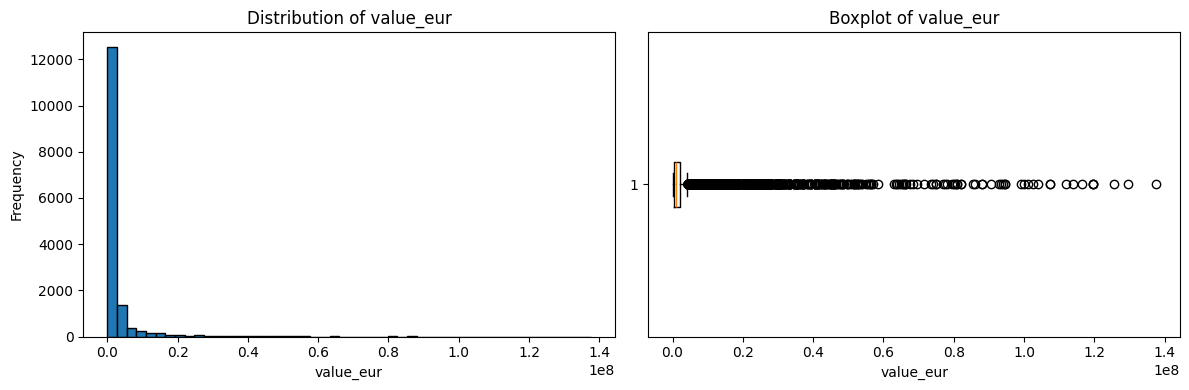

In [166]:
# Prepare side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histogram
axes[0].hist(train['value_eur'].dropna(), bins=50, edgecolor='black')
axes[0].set_title('Distribution of value_eur')
axes[0].set_xlabel('value_eur')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(train['value_eur'].dropna(), vert=False)
axes[1].set_title('Boxplot of value_eur')
axes[1].set_xlabel('value_eur')

plt.tight_layout()
plt.show()

We can notice from the plots above that the distribution of the target variable is highly right skewed, therefore we log transform it.

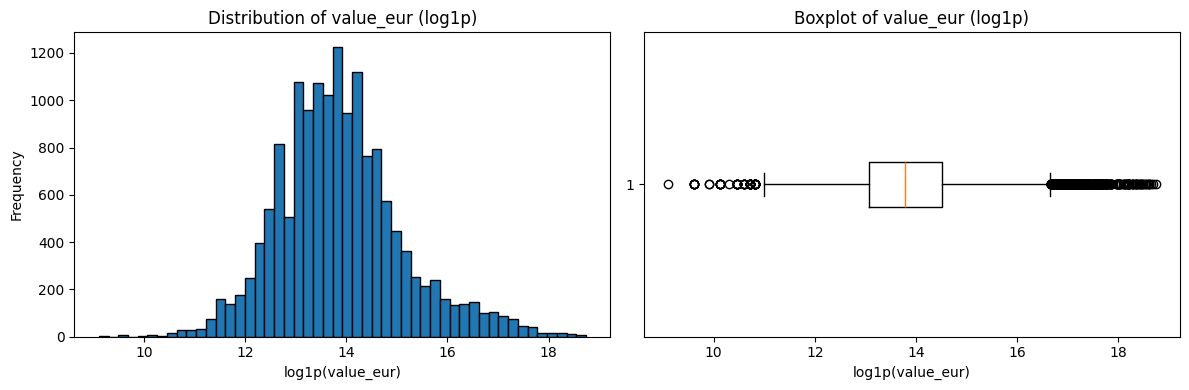

In [167]:
# Create the log-transformed target
log_target = np.log1p(train['value_eur'].clip(lower=0))

# Prepare side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histogram of log1p(value_eur)
axes[0].hist(log_target.dropna(), bins=50, edgecolor='black')
axes[0].set_title('Distribution of value_eur (log1p)')
axes[0].set_xlabel('log1p(value_eur)')
axes[0].set_ylabel('Frequency')

# Boxplot of log1p(value_eur)
axes[1].boxplot(log_target.dropna(), vert=False)
axes[1].set_title('Boxplot of value_eur (log1p)')
axes[1].set_xlabel('log1p(value_eur)')

plt.tight_layout()
plt.show()

### 1.4 Correlation among variables 

Calculate the correlation matrix and identify pairs of features with high correlation (> 0.7). For each such pair, compare their correlation with the target variable value_eur, and append the one with the lower correlation in cols_to_drop to reduce redundancy while preserving predictive power.

In [210]:
 # Compute the correlation matrix for numeric columns only
corr = train.corr(numeric_only=True)

# Define the target variable and correlation threshold
TARGET  = 'value_eur'
THRESH  = 0.70

# Find all pairs of features that are highly correlated with each other (above the threshold)
pairs = [(c1, c2)
         for c1 in corr.columns
         for c2 in corr.columns
         if c1 != c2 and abs(corr.loc[c1, c2]) > THRESH]

# Initialize a set to collect columns to drop (avoid duplicates)
cols_to_drop = set()

# Loop through each highly correlated pair
for c1, c2 in pairs:
    # Keep the feature more strongly correlated with the target
    if corr.loc[c1, TARGET] > corr.loc[c2, TARGET]:
        cols_to_drop.add(c2)  # Drop c2 if c1 is more useful
    else:
        cols_to_drop.add(c1)  # Drop c1 if c2 is more useful

# Print the number and names of columns flagged for removal
print(f"{len(cols_to_drop)} columns flagged:\n{cols_to_drop}")


40 columns flagged:
{'attacking_volleys', 'movement_sprint_speed', 'goalkeeping_diving', 'wage_eur', 'dribbling', 'movement_agility', 'goalkeeping_handling', 'movement_balance', 'movement_acceleration', 'skill_long_passing', 'mentality_interceptions', 'attacking_heading_accuracy', 'goalkeeping_positioning', 'power_long_shots', 'skill_fk_accuracy', 'mentality_positioning', 'passing', 'attacking_crossing', 'defending_marking_awareness', 'attacking_finishing', 'goalkeeping_kicking', 'height_cm', 'mentality_penalties', 'skill_ball_control', 'mentality_vision', 'power_strength', 'release_clause_eur', 'goalkeeping_reflexes', 'movement_reactions', 'skill_moves', 'defending_sliding_tackle', 'power_stamina', 'mentality_aggression', 'id', 'attacking_short_passing', 'mentality_composure', 'shooting', 'skill_dribbling', 'defending_standing_tackle', 'skill_curve'}


The correlation matrix below serves as a tool in our feature analysis, allowing us to detect multicollinearity among variables that may impact model performance.

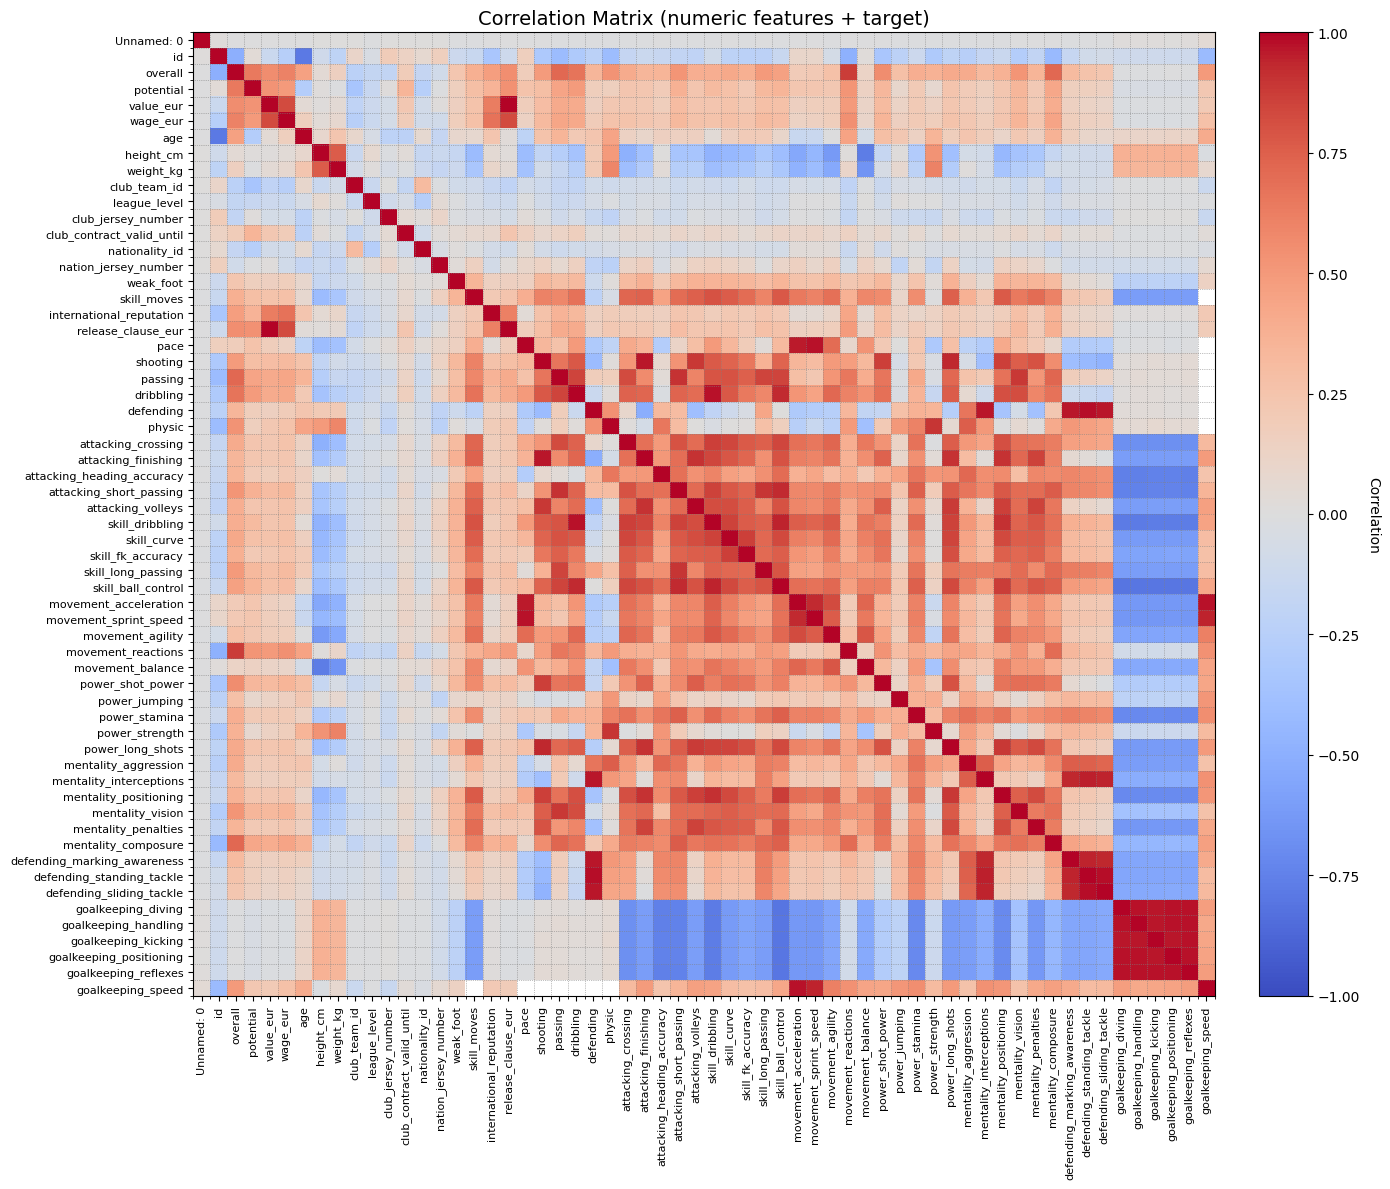

In [211]:
# Create figure and axis with larger size
fig, ax = plt.subplots(figsize=(14, 12))  # Bigger figure for readability

# Show correlation matrix with diverging color map for better contrast
im = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')

# Set axis ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticklabels(corr.columns, fontsize=8)

# Add gridlines between cells
ax.set_xticks(np.arange(-.5, len(corr.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(corr.columns), 1), minor=True)
ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

# Add colorbar with label
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Correlation', rotation=270, labelpad=15)

# Add title
ax.set_title("Correlation Matrix (numeric features + target)", fontsize=14)

# Tight layout for proper spacing
plt.tight_layout()
plt.show()


## 2. Preprocessing 

We create a loading and cleaning function and a function that applies tome minimal pre processing to our data that we can call when applying different models.

In [197]:
def load_and_clean(filepath):
    # 1) Load and drop rows with missing target
    df = pd.read_csv(filepath)
    df = df.dropna(subset=['value_eur'])
    
    # 2a) Separate target
    y = df.pop('value_eur')
    X = df.copy()

    # 2b) Apply log transformation to the target variable since it is highly skewed
    y = np.log1p(y) 

    # 2c) Apply log transformation to the wage_eur feature since it is highly skewed
    if 'wage_eur' in X:
        X['wage_eur'] = np.log1p(X['wage_eur'])

    # 3a) Drop worst‐missing features 
    drop_missing = X.isnull().sum().nlargest(6).index
    X = X.drop(columns=drop_missing)

    # 3b) Drop irrelevant IDs and release_clause_eur which creates multicollinearity 
    drop_ids = [
        'Unnamed: 0', 'id', 'short_name', 'long_name',
        'dob', 'nationality_id', 'club_jersey_number', 'club_team_id', 'release_clause_eur',
    ]
    X = X.drop(columns=drop_ids)
    
    # 3c) Modify features in form of dates extracting the year
    X['club_joined'] = pd.to_datetime(X['club_joined'], errors='coerce')
    X['club_joined_year'] = X['club_joined'].dt.year
    X = X.drop(columns=['club_joined'])
    
    return X, y


# Define the preprocesssor
preprocessor = ColumnTransformer([
    # numeric: median‐impute + scale
    ('num',
       Pipeline([
           ('imputer', SimpleImputer(strategy='median')),
           ('scaler',   StandardScaler())
       ]),
       make_column_selector(dtype_include=np.number)
    ),
    # categorical: constant‐impute + one‐hot
    ('cat',
       Pipeline([
           ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
           ('onehot',  OneHotEncoder(handle_unknown='ignore',
                                     sparse_output=False))
       ]),
       make_column_selector(dtype_exclude=np.number)
    )
],
    remainder='drop'  # drop anything else
)

## Feature engineering 

Here we define a transformer to apply our additional feature engineering  

In [171]:
from sklearn.preprocessing import FunctionTransformer

def feat_eng(df, *, cols_to_drop = cols_to_drop):
    """
    • Drop pre-selected high-correlation columns
    • Add age_squared
    • Add is_defender / is_midfielder / is_forward / is_goalkeeper
      from player_positions, then drop player_positions
    """
    X = df.drop(columns=cols_to_drop, errors='ignore').copy()

    # age² 
    if 'age' in X:
        X['age_squared'] = X['age'] ** 2

    # role dummies (your preferred loop) 
    if 'player_positions' in X:
        role_to_group = {
            'GK':'Goalkeeper',
            'CB':'Defender','LB':'Defender','RB':'Defender',
            'LWB':'Defender','RWB':'Defender',
            'CDM':'Midfielder','CM':'Midfielder','CAM':'Midfielder',
            'LM':'Midfielder','RM':'Midfielder',
            'ST':'Forward','CF':'Forward','LW':'Forward','RW':'Forward'
        }

        X['is_defender']   = 0
        X['is_midfielder'] = 0
        X['is_forward']    = 0
        X['is_goalkeeper'] = 0

        for idx, pos in X['player_positions'].dropna().items():
            roles   = [r.strip() for r in pos.split(',')]
            groups  = {role_to_group.get(r, 'Goalkeeper') for r in roles}

            if 'Defender'   in groups: X.at[idx, 'is_defender']   = 1
            if 'Midfielder' in groups: X.at[idx, 'is_midfielder'] = 1
            if 'Forward'    in groups: X.at[idx, 'is_forward']    = 1
            if 'Goalkeeper' in groups: X.at[idx, 'is_goalkeeper'] = 1

        X = X.drop(columns=['player_positions'])

    return X

feat_eng_step = FunctionTransformer(
    feat_eng,
    validate=False,                      # keep DataFrame intact
    kw_args={'cols_to_drop': cols_to_drop}   
)


## Baseline model 

Let's define our scorers that we will use to assess the performance of our models later.

In [172]:
from sklearn.metrics           import make_scorer, mean_squared_error, r2_score

def rmse_eur(log_true, log_pred):
    return np.sqrt(mean_squared_error(np.expm1(log_true), np.expm1(log_pred)))

def r2_eur(log_true, log_pred):
    return r2_score(np.expm1(log_true), np.expm1(log_pred))

eur_rmse = make_scorer(rmse_eur, greater_is_better=False)   # minimise
eur_r2   = make_scorer(r2_eur)

We tried to model a Linear Regression on our minimally pre-processed data and obtained the following results.

In [200]:
# Load data
X, y = load_and_clean('data/train.csv')

print("Columns in X:", X.columns.tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 80 % train / 20 % test
    random_state= 20,        # reproducible split
    shuffle=True
)
# Build Linear Regression pipeline
pipeline = Pipeline([
    ('feat_eng',  feat_eng_step),
    ('preprocess', preprocessor),
    ('model',      LinearRegression())
])

cv = KFold(n_splits=5, shuffle=True, random_state=18)

cv_res = cross_validate(
    pipeline, X, y,
    scoring={"rmse": eur_rmse, "r2": eur_r2},
    cv=cv,
    n_jobs=-1,
    return_train_score=True,
)

# helper to pretty-print mean ± std
def fmt(mean, std, decimals=0):
    return f"{mean:.{decimals}f} ± {std:.{decimals}f}"

train_rmse = -cv_res["train_rmse"]         # make positive again
val_rmse   = -cv_res["test_rmse"]

print("── 5-fold cross-validation results (euro scale) ──")
print(f"Train RMSE : {fmt(train_rmse.mean(), train_rmse.std())}")
print(f"Val   RMSE : {fmt(val_rmse.mean(),   val_rmse.std())}")
print(f"Train R²   : {fmt(cv_res['train_r2'].mean(), cv_res['train_r2'].std(), 3)}")
print(f"Val   R²   : {fmt(cv_res['test_r2'].mean(),  cv_res['test_r2'].std(), 3)}")


Columns in X: ['player_positions', 'overall', 'potential', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_level', 'club_position', 'club_contract_valid_until', 'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_

Python(60264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60265) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60267) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60268) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60270) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(60271) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


── 5-fold cross-validation results (euro scale) ──
Train RMSE : 1906859 ± 115261
Val   RMSE : 1978917 ± 560459
Train R²   : 0.936 ± 0.006
Val   R²   : 0.928 ± 0.035


Train RMSE (EUR): 2035754
Test  RMSE (EUR): 1457539
Train  R² (EUR):  0.929
Test   R² (EUR):  0.958

## Lasso implementation
We chose Lasso specifically because it forces many of the learned coefficients βⱼ to be exactly 0. That means the model itself performs feature selection, leaving only the most predictive variables active and giving us a concise, easily interpretable list of drivers of player value. Because of this built-in sparsity, we kept our preprocessing pipeline as minimal as possible, no elaborate feature engineering beyond basic imputation and scaling, so that every nonzero coefficient directly corresponds to a raw input feature, making the final model both simple and transparent.

In [119]:
import pandas as pd
import numpy as np

from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer, make_column_selector
from sklearn.impute        import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model  import LassoCV
from sklearn.model_selection import KFold, cross_val_score

# Load data
X, y = load_and_clean("data/train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 80 % train / 20 % test
    random_state= 18,        # reproducible split
    shuffle=True
)

# α tuning with LassoCV  
alpha_search = np.logspace(-5, -3, 20)          

pipe_cv = Pipeline([
    ('prep',  preprocessor),
    ('lasso', LassoCV(alphas=alpha_search,
                      cv=5,          # internal k-fold only on X_tr
                      max_iter=10_000,
                      n_jobs=-1,
                      random_state=42))
])

pipe_cv.fit(X_train, y_train)
best_alpha = pipe_cv.named_steps['lasso'].alpha_
print(f"Best α from CV: {best_alpha:.6f}")


# Lasso fit
pipe_final = Pipeline([
    ('prep',  preprocessor),
    ('lasso', Lasso(alpha=best_alpha, max_iter=10_000))
]).fit(X_train, y_train)


# Predict on train & test → back-transform → metrics
y_tr_pred = pipe_final.predict(X_train)
y_te_pred = pipe_final.predict(X_test)

# back-transform from log(1+x) to €
y_tr_true     = np.expm1(y_train)
y_te_true     = np.expm1(y_test)
y_tr_pred_eur = np.expm1(y_tr_pred)
y_te_pred_eur = np.expm1(y_te_pred)

train_rmse_eur = np.sqrt(mean_squared_error(y_tr_true, y_tr_pred_eur))
test_rmse_eur  = np.sqrt(mean_squared_error(y_te_true, y_te_pred_eur))

train_r2_eur = r2_score(y_tr_true, y_tr_pred_eur)
test_r2_eur  = r2_score(y_te_true, y_te_pred_eur)

print(f"\nTrain RMSE (EUR): {train_rmse_eur:.0f}")
print(f"Test  RMSE (EUR): {test_rmse_eur:.0f}")
print(f"Train  R² (EUR):  {train_r2_eur:.3f}")
print(f"Test   R² (EUR):  {test_r2_eur:.3f}")


Best α from CV: 0.000070

Train RMSE (EUR): 2118461
Test  RMSE (EUR): 1647109
Train  R² (EUR):  0.923
Test   R² (EUR):  0.946


Try Decision Tree

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Load data
X, y = load_and_clean("data/train.csv")

# Build the full pipeline ------------------------------------------
tree_pipe = Pipeline(steps=[
    ("feat_eng", feat_eng_step),          # custom transformer (stateless)
    ("prep"    , preprocessor),           # ColumnTransformer: imputes, scales, encodes
    ("model"   , DecisionTreeRegressor(
        random_state=18,                  # reproducibility
        min_samples_leaf=5,               # light regularisation (tweak as you like)
        ccp_alpha=0.0
    )),
])

# 3) Scorer in EURO

def rmse_eur(log_true, log_pred):
    return np.sqrt(mean_squared_error(np.expm1(log_true), np.expm1(log_pred)))

def r2_eur(log_true, log_pred):
    return r2_score(np.expm1(log_true), np.expm1(log_pred))

eur_rmse = make_scorer(rmse_eur, greater_is_better=False)  # negate: lower is better
eur_r2   = make_scorer(r2_eur)

cv = KFold(n_splits=5, shuffle=True, random_state=18)

cv_res = cross_validate(
    tree_pipe, X, y,
    scoring={"rmse": eur_rmse, "r2": eur_r2},
    cv=cv,
    n_jobs=-1,
    return_train_score=True,
)

# helper to pretty-print mean ± std
def fmt(mean, std, decimals=0):
    return f"{mean:.{decimals}f} ± {std:.{decimals}f}"

train_rmse = -cv_res["train_rmse"]         # make positive again
val_rmse   = -cv_res["test_rmse"]

print("── 5-fold cross-validation results (euro scale) ──")
print(f"Train RMSE : {fmt(train_rmse.mean(), train_rmse.std())}")
print(f"Val   RMSE : {fmt(val_rmse.mean(),   val_rmse.std())}")
print(f"Train R²   : {fmt(cv_res['train_r2'].mean(), cv_res['train_r2'].std(), 3)}")
print(f"Val   R²   : {fmt(cv_res['test_r2'].mean(),  cv_res['test_r2'].std(), 3)}")

── 5-fold cross-validation results (euro scale) ──
Train RMSE : 981230 ± 175596
Val   RMSE : 1303916 ± 180938
Train R²   : 0.983 ± 0.006
Val   R²   : 0.970 ± 0.005


In [132]:
981230/1303916

0.75252546943208

K Neighbors Regression pipeline and grid search of hyper-parameters.

In [157]:
from sklearn.neighbors import KNeighborsRegressor          
from sklearn.metrics import make_scorer, mean_squared_error, r2_score



# K Neighbors Pipeline 
knn_pipe = Pipeline(steps=[
    ("feat_eng", feat_eng_step),          # custom transformer 
    ("prep"    , preprocessor),           # ColumnTransformer: imputes, scales, encodes
    ("model"   , KNeighborsRegressor(     
        n_neighbors=10,                   # iper-parametro principale
        weights="distance",              # puoi cambiare a "uniform" se vuoi
        p=2                               # 1 = Manhattan, 2 = Euclidean
    )),
])


# Hyper-parameter grid 
param_grid = {
    "model__n_neighbors": [10, 20, 40, 60, 100],
    "model__weights": ["distance", "uniform"],
    "model__p": [1, 2],
}

# 5-fold CV splitter
cv = KFold(n_splits=5, shuffle=True, random_state=18)

# Grid-search
gs = GridSearchCV(
    knn_pipe,
    param_grid,
    scoring=eur_rmse,       # negative euro-RMSE
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

gs.fit(X, y)

print("\nBest hyper-parameters:", gs.best_params_)
print(f"Best CV RMSE (EUR): {-gs.best_score_:,.0f}")


# Tuned pipeline ready to use
best_knn_pipe = gs.best_estimator_   # already refit on ALL training data

Python(49213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49215) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49216) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49217) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49219) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49220) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



Best hyper-parameters: {'model__n_neighbors': 10, 'model__p': 1, 'model__weights': 'distance'}
Best CV RMSE (EUR): 3,865,184


Random Forest pipeline and grid search of hyper-parameters.

In [155]:
# Random-Forest pipeline + grid-search 
from sklearn.ensemble          import RandomForestRegressor
from sklearn.pipeline          import Pipeline
from sklearn.model_selection   import GridSearchCV, KFold


# Random Forest Pipeline
rf_pipe = Pipeline([
    ("feat_eng", feat_eng_step),     # your FunctionTransformer
    ("prep"    , preprocessor),      # ColumnTransformer
    ("model"   , RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=2,
        random_state=18,
        n_jobs=-1
    )),
])

# Hyper-parameter grid 
param_grid = {
    "model__n_estimators":     [300, 500, 700],
    "model__max_depth":        [None, 20, 30],
    "model__min_samples_leaf": [2, 5, 10],
}

# 5-fold CV splitter
cv = KFold(n_splits=5, shuffle=True, random_state=18)

# Grid-search
gs = GridSearchCV(
    rf_pipe,
    param_grid,
    scoring=eur_rmse,       # negative euro-RMSE
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

gs.fit(X, y)

print("\nBest hyper-parameters:", gs.best_params_)
print(f"Best CV RMSE (EUR): {-gs.best_score_:,.0f}")


# Tuned pipeline ready to use
best_rf_pipe = gs.best_estimator_   # already refit on ALL training data


Python(47747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(47754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



Best hyper-parameters: {'model__max_depth': 30, 'model__min_samples_leaf': 2, 'model__n_estimators': 500}
Best CV RMSE (EUR): 959,573


Decision Tree pipeline and grid search of hyper-parameters.

In [159]:
# Decision Tree pipeline + grid-search 
from sklearn.tree              import DecisionTreeRegressor
from sklearn.pipeline          import Pipeline
from sklearn.model_selection   import GridSearchCV, KFold


# Decision Tree Pipeline
tree_pipe = Pipeline([
    ("feat_eng", feat_eng_step),     # your FunctionTransformer
    ("prep"    , preprocessor),      # ColumnTransformer
    ("model"   , DecisionTreeRegressor(
        random_state=18,                  # reproducibility
        min_samples_leaf=5,               # light regularisation (tweak as you like)
        ccp_alpha=0.0
    )),
])


# Hyper-parameter grid 
param_grid = {
    "model__max_depth": [5, 10, 20, None],
    "model__min_samples_leaf": [1, 5, 10, 20],
    "model__ccp_alpha": [0.0, 0.001, 0.01],
}

# 5-fold CV splitter
cv = KFold(n_splits=5, shuffle=True, random_state=18)

# Grid-search
gs = GridSearchCV(
    tree_pipe,
    param_grid,
    scoring=eur_rmse,       # negative euro-RMSE
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

gs.fit(X, y)

print("\nBest hyper-parameters:", gs.best_params_)
print(f"Best CV RMSE (EUR): {-gs.best_score_:,.0f}")


# Tuned pipeline ready to use
best_tree_pipe = gs.best_estimator_   # already refit on ALL training data


Python(49748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49753) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49754) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(49755) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



Best hyper-parameters: {'model__ccp_alpha': 0.0, 'model__max_depth': 20, 'model__min_samples_leaf': 5}
Best CV RMSE (EUR): 1,303,870


We selected the Random Forest Regressor as the best model based on its performance since it achieved the lowest cross-validated RMSE, outperforming both the single Decision Tree and k-NN by a significant margin.
Unlike a single tree, the ensemble of trees in Random Forest reduces variance and produces more stable, generalizable predictions. Compared to k-NN, it scales better with high-dimensional data (which we have due to one-hot encoding), and is less sensitive to the curse of dimensionality.



XGBoost pipeline and grid search of hyper-parameters.

In [181]:
# XGBoost pipeline + grid-search 
from xgboost              import XGBRegressor
from sklearn.pipeline          import Pipeline
from sklearn.model_selection   import GridSearchCV, KFold


# XGBoost Pipeline
xgb_pipe = Pipeline([
    ("feat_eng", feat_eng_step),     # your FunctionTransformer
    ("prep"    , preprocessor),      # ColumnTransformer
    ("model"   , XGBRegressor(
        objective="reg:squarederror",  # for regression
        random_state=42,
        n_jobs=-1,
        verbosity=0
    ))
])


# Hyper-parameter grid 
param_grid = {
    "model__n_estimators": [300, 500],
    "model__max_depth": [2, 3],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.7, 1.0],
    "model__colsample_bytree": [0.7, 1.0],
    "model__reg_alpha": [0, 1],
    "model__reg_lambda": [1, 5]
}

# 5-fold CV splitter
cv = KFold(n_splits=5, shuffle=True, random_state=18)

# Grid-search
gs = GridSearchCV(
    xgb_pipe,
    param_grid,
    scoring=eur_rmse,       # negative euro-RMSE
    cv=cv,
    n_jobs=-1,
    return_train_score=True
)

gs.fit(X, y)

print("\nBest hyper-parameters:", gs.best_params_)
print(f"Best CV RMSE (EUR): {-gs.best_score_:,.0f}")


# Tuned pipeline ready to use
best_xgb_pipe = gs.best_estimator_   # already refit on ALL training data


Python(59046) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59047) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59048) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59049) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59052) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59053) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



Best hyper-parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 500, 'model__reg_alpha': 0, 'model__reg_lambda': 1, 'model__subsample': 0.7}
Best CV RMSE (EUR): 595,042


In [182]:
# Load your custom functions and pipeline steps here
X, y = load_and_clean('data/train.csv')

cv = KFold(n_splits=5, shuffle=True, random_state= 18)

cv_res = cross_validate(
    best_xgb_pipe, X, y,
    scoring={"rmse": eur_rmse, "r2": eur_r2},
    cv=cv,
    n_jobs=-1,
    return_train_score=True,
)

# helper to pretty-print mean ± std
def fmt(mean, std, decimals=0):
    return f"{mean:.{decimals}f} ± {std:.{decimals}f}"

train_rmse = -cv_res["train_rmse"]         # make positive again
val_rmse   = -cv_res["test_rmse"]

print("── 5-fold cross-validation results (euro scale) ──")
print(f"Train RMSE : {fmt(train_rmse.mean(), train_rmse.std())}")
print(f"Val   RMSE : {fmt(val_rmse.mean(),   val_rmse.std())}")
print(f"Train R²   : {fmt(cv_res['train_r2'].mean(), cv_res['train_r2'].std(), 3)}")
print(f"Val   R²   : {fmt(cv_res['test_r2'].mean(),  cv_res['test_r2'].std(), 3)}")


Python(59230) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(59232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


── 5-fold cross-validation results (euro scale) ──
Train RMSE : 494246 ± 19471
Val   RMSE : 595042 ± 102463
Train R²   : 0.996 ± 0.000
Val   R²   : 0.994 ± 0.002


In [184]:
402317/637234

494246/595042

0.8306069151421244